<a href="https://colab.research.google.com/github/NithderP/NithderP/blob/main/Homework5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5 - Business Machine Learning


##step 1

###Business question :

How do customer demographic and financial attributes combined with marketing campaign outcomes influence a client's decision to subscribe to a term deposit?


###Goal:
The ultimate goal is to increase the number of clients subscribing to term deposits. By identifying the key factors that lead to successful subscriptions and focusing on those in marketing efforts, the bank can improve conversion rates.

# Data overview

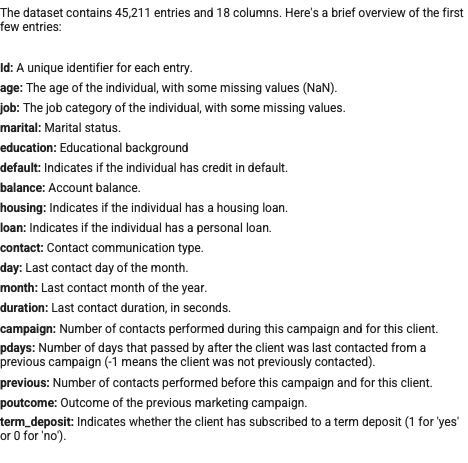

## Importing the required packages

In [6]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt

## Step 2 - Loading the data


In [8]:
# Loading the data
df = pd.read_csv('/content/term_deposit_subscription.csv')
df = df.rename(columns={'y': 'term_deposit'})
df.head()


,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,1001,NaN,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,NaN,NaN,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,NaN,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
# Shape of the data
df = df.drop(columns=['Id'])
df.shape

(45211, 17)

## Step 3 - Data cleaning and processing

In [10]:
# Check for missing values in all columns
missing_values = df.isnull().sum()

missing_values


age             12
job              1
marital          0
education        0
default          0
balance          3
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
term_deposit     0
dtype: int64

In [11]:
# Remove rows with missing values
df = df.dropna()
df.shape


(45197, 17)

In [12]:
# List of columns to update
columns_to_update = ['default', 'housing', 'loan', 'term_deposit']

# Iterating over each column and replacing 'yes' with 1 and 'no' with 0
for column in columns_to_update:
    df[column] = df[column].replace({'yes': 1, 'no': 0})

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
3,47.0,blue-collar,married,unknown,0,1506.0,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33.0,unknown,single,unknown,0,1.0,0,0,unknown,5,may,198,1,-1,0,unknown,0
5,35.0,management,married,tertiary,0,231.0,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28.0,management,single,tertiary,0,447.0,1,1,unknown,5,may,217,1,-1,0,unknown,0
10,41.0,admin.,divorced,secondary,0,270.0,1,0,unknown,5,may,222,1,-1,0,unknown,0


In [5]:
df.shape

(10999, 17)

## Step 4 - Data Splitting, Encoding and Modeling


Finding the best k based on accuracy


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Separate features (X) and target (y)
X = df.drop(columns=['term_deposit'])
y = df['term_deposit']

# Converting categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Step 2: Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 4: Train the KNN model and choose the best K based on accuracy
best_accuracy = 0
best_k = 0
for k in range(1, 21):  # trying K values from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_val_scaled)
    accuracy = accuracy_score(y_val, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Best K value based on accuracy:", best_k)

Best K value based on accuracy: 8


## Step 5 - Result Explanation

In [14]:
# First Example

first_example = X_val.iloc[0].values.reshape(1, -1)
neighbors_idx = knn.kneighbors(first_example, n_neighbors=best_k, return_distance=False)
neighbor_labels = y_train.iloc[neighbors_idx[0]]
print("Neighbor labels for the first example:", neighbor_labels)



Neighbor labels for the first example: 15682    0
24044    1
44602    0
6451     1
9947     1
12347    1
32713    1
4382     0
Name: term_deposit, dtype: int64


### Explanation for the first example

Based on the output for the first example, the prediction for the client is expected to be 1(which means yes to term deposit subscription). The reason is that, 5 out of these 8 neighbors have subscribed to a term deposit (1), and 3 have not (0). This implies that since the majority of neighboring data points belong to '1' class , the client is also predicted to subscribe to a term deposit.


In [15]:
# Second Example

second_example = X_val.iloc[1].values.reshape(1, -1)
neighbors_idx = knn.kneighbors(second_example, n_neighbors=best_k, return_distance=False)
neighbor_labels = y_train.iloc[neighbors_idx[0]]
print("Neighbor labels for the second example:", neighbor_labels)

Neighbor labels for the second example: 24148    0
9947     1
44602    0
30747    1
6451     1
24095    0
24044    1
12347    1
Name: term_deposit, dtype: int64


### Explanation for the second example

In the second example, among the 8 closest neighbors, 6 have subscribed to a term deposit (represented as '1'), while 2 have not ('0'). Consequently, the predominance of '1' class neighbors leads to the prediction that the client will likely subscribe to a term deposit as well.